In [ ]:
import numpy as np
import matplotlib.pyplot as plt

***Pregunta 1)***

***Inciso a)***

In [ ]:
#Definimos el vector de tiempo
t=np.arange(0,100,0.1)
#Defino la señal en el tiempo, la cual es una función modulada en amplitud
x_t=3*np.cos(20*np.pi*(t**2))*np.sin(80*np.pi*t)
#Defino la frecuencia de muestreo
fs=800
#Se define el numero de segmentos(M),la longitud del segmento(L) y el número de muestras en total(N)
M = 128
L = 64
N=M*L
#Definimos un arreglo con el número total de muestras
n = np.arange(N)
tn = n / fs
#Definimos la señal muestreada
x_n=3*np.cos(20*np.pi*(tn**2))*np.sin(80*np.pi*tn)

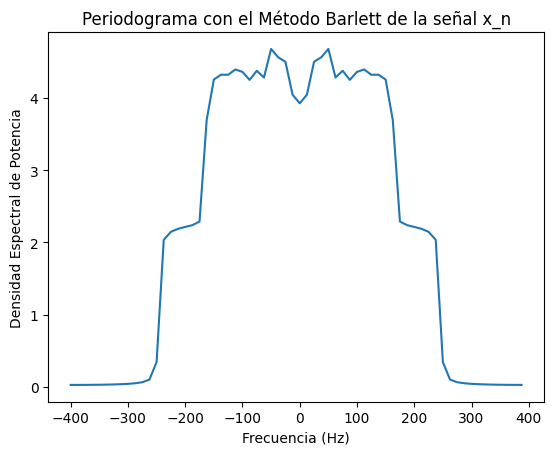

In [ ]:
#Método Barlett para calcular el periodograma
#Inicializamos con ceros la matriz Xn1 de M*L
Xn1 = np.zeros([M,L])
#Realizamos la iteración para los M segmentos que tenemos
for m in range(M):
  #Extraemos en cada iteración el segmento M de longitud L
  xm = x_n[m*L:(m+1)*L]
  #Procedemos a calcular la transformada de fourier del segmento que extrajimos,se toma el valor absoluto,se eleva al cuadrado y se normaliza diviendo por L como parte de la fórmula
  Xn1[m,:] = np.abs(np.fft.fft(xm))**2/L

#Ahora calculamos el promedio de todos los valores que almacenamos en Xn1 para poder hallar su periodograma
Pxx=np.mean(Xn1,axis=0)

#Realizamos el desplazamiento para centrar las frecuencias
Xn1 = np.fft.fftshift(Pxx)
#Definimos el vector de frecuencias
fk = (np.arange(L) - L/2) * fs / L

#Graficamos el periodograma de la señal
fig = plt.figure()
plt.title('Periodograma con el Método Barlett de la señal x_n')
plt.plot(fk,Xn1)
plt.ylabel('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.show()

De acuerdo a lo observado en nuestra gráfica del periodograma , podemos observar que nuestra señal se encuentra entre -200 Hz a 200 Hz , esto es debido a que es donde la densidad espectral de potencia presenta un valor significativo , es decir que la mayor parte de energia está contenida en ese ancho de banda.

***Inciso b)***

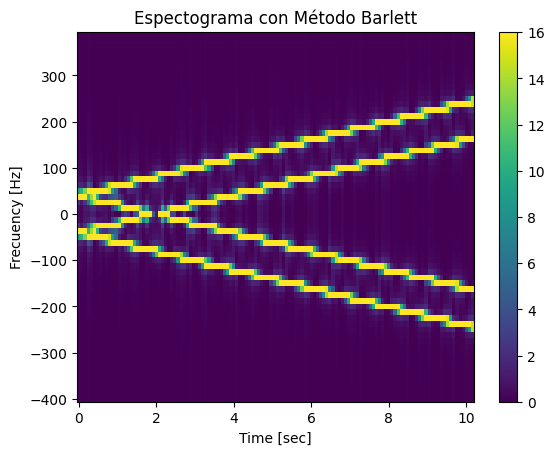

In [ ]:
#Método Barlett para calcular el espectograma
#Inicalizamos la transformada Xn con una matriz de ceros de M filas por L columnas
Xn = np.zeros([M,L])
#Realizamos la iteración para los M segmentos que tenemos
for m in range(M):
  #Extraemos en cada iteración el segmento M de longitud L
  xm = x_n[m*L:(m+1)*L]
  #Procedemos a calcular la transformada de fourier del segmento que extrajimos,se toma el valor absoluto,se eleva al cuadrado y se normaliza diviendo por L como parte de la fórmula
  Xn[m,:] = np.abs(np.fft.fft(xm))**2 / L

#Realizamos el desplazamiento para centrar las frecuencias
Xn = np.fft.fftshift(Xn,axes=1)
#Generamos el vector de frecuencias
fk = (np.arange(L) - L/2) * fs / L
#Generamos el vector de tiempo
tm = np.arange(M) * L / fs
#Graficamos el espectograma
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xn.T,shading='auto')
plt.title("Espectograma con Método Barlett")
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
#plt.ylim([-300,300])
plt.colorbar(c)
plt.show()

Se puede notar la presencia de fuga de frecuencia debido a que las lineas que contienen nuestras frecuencias no se encuentran nitidas,además existen pequeños saltos entre cada linea no haciendo uniforme el trazo a lo largo de las frecuencias.

***Inciso c)***

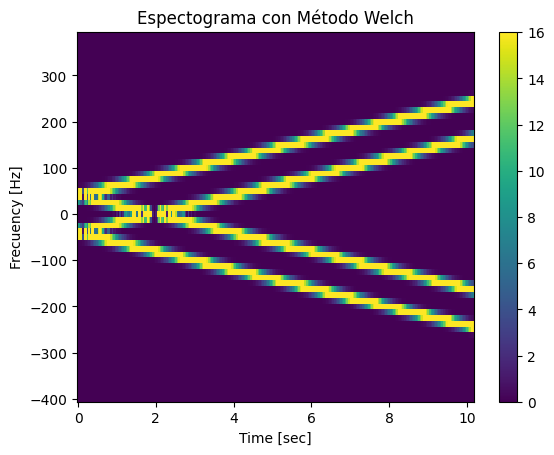

In [ ]:
#Método Welch para calcular el espectograma con 32 muestras de traslape
#Generamos la venta Hamming de longitud L
w = np.hamming(L)
#Normalizamos la ventana de Hamming
w = w / np.sqrt(np.mean(np.abs(w)**2))
#Definimos el número de muestras de traslape que se tendrá
Lo = 32
#Calculamos el número de segmentos que tendremos después de tener el traslape
Mo = np.int64((N-Lo)/(L-Lo))

#Inicializamos con ceros la matriz Xn_ov de M*L
Xn_ov = np.zeros([Mo,L],np.cdouble)

#Realizamos la iteración para los M segmentos que tenemos
for m in range(Mo):
    #Extraemos en cada iteración el segmento M de longitud L
    xm = w*x_n[m*(L-Lo):((m+1)*L-m*Lo)]
    #Procedemos a calcular la transformada de fourier del segmento que extrajimos,se toma el valor absoluto,se eleva al cuadrado y se normaliza diviendo por L como parte de la fórmula
    Xn_ov[m,:] = np.fft.fft(xm)**2/L

#Realizamos el desplazamiento para centrar las frecuencias
Xn_ov = np.fft.fftshift(Xn_ov,axes=1)
#Generamos el vector de tiempo con el debido overlape
tov = np.arange(Mo) * (L-Lo) / fs

#Ploteamos el espectograma por el Método Welch
fig = plt.figure()
c = plt.pcolormesh(tov,fk,np.abs(Xn_ov.T),shading='auto')
plt.title('Espectograma con Método Welch')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.colorbar(c)
plt.show()

Para este caso podemos observar que la fuga de frecuencia a disminuido esto es debido a que en el método de Welch utiliza segmentos superpuestos y la técnica de enventanamiento lo que nos genera más muestras. Esto se puede notar tambien al momento de observar el gráfico ya que no presenciamos saltos tan notorios entre las lineas que representan nuestras frecuencias.

***Inciso d)***

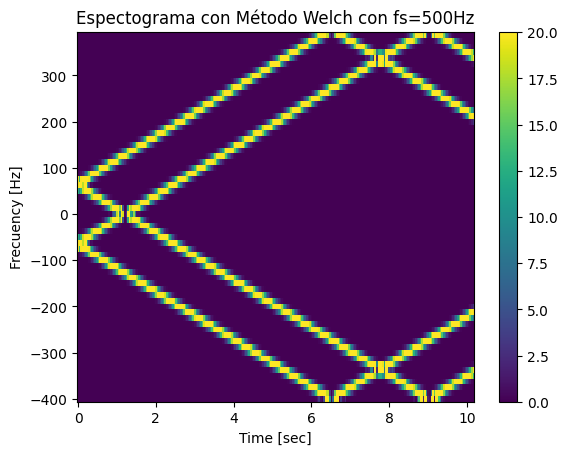

In [ ]:
#Repetimos lo hecho en c, pero ahora nuestra frecuencia de muestreo será de 500 Hz para generar x[n]
#Defino la frecuencia de muestreo
fs1=500
#Definimos un arreglo con el número total de muestras
n = np.arange(N)
tn1 = n / fs1
#Definimos la señal muestreada
x_n1=3*np.cos(20*np.pi*(tn1**2))*np.sin(80*np.pi*tn1)

#Generamos la venta Hamming de longitud L
w = np.hamming(L)
#Normalizamos la ventana de Hamming
w = w / np.sqrt(np.mean(np.abs(w)**2))
#Definimos el número de muestras de traslape que se tendrá
Lo = 32
#Calculamos el número de segmentos que tendremos después de tener el traslape
Mo = np.int64((N-Lo)/(L-Lo))

#Inicializamos con ceros la matriz Xn_ov de M*L
Xn_ov = np.zeros([Mo,L],np.cdouble)

#Realizamos la iteración para los M segmentos que tenemos
for m in range(Mo):
    #Extraemos en cada iteración el segmento M de longitud L
    xm = w*x_n1[m*(L-Lo):((m+1)*L-m*Lo)]
    #Procedemos a calcular la transformada de fourier del segmento que extrajimos,se toma el valor absoluto,se eleva al cuadrado y se normaliza diviendo por L como parte de la fórmula
    Xn_ov[m,:] = np.fft.fft(xm)**2/L

#Realizamos el desplazamiento para centrar las frecuencias
Xn_ov = np.fft.fftshift(Xn_ov,axes=1)
#Generamos el vector de tiempo con el debido overlape
tov = np.arange(Mo) * (L-Lo) / fs

#Ploteamos el espectograma por el Método Welch
fig = plt.figure()
c = plt.pcolormesh(tov,fk,np.abs(Xn_ov.T),shading='auto')
plt.title('Espectograma con Método Welch con fs=500Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
#plt.ylim([-500,500])
plt.clim([0,20])
plt.colorbar(c)
plt.show()

Lo que podemos observar que se diferencia son las lineas que representan las frecuencias en este caso al tener una menor frecuencia de muestreo obtenemos una menor resolución temporal, es debido a eso que las lineas se obserban menos definidas, de igual manera notamos que tenemos como dos lineas de frecuencia lo que no notamos al muestrear con una frecuencia igual a 800Hz.

***Pregunta 2***

***Inciso a)***

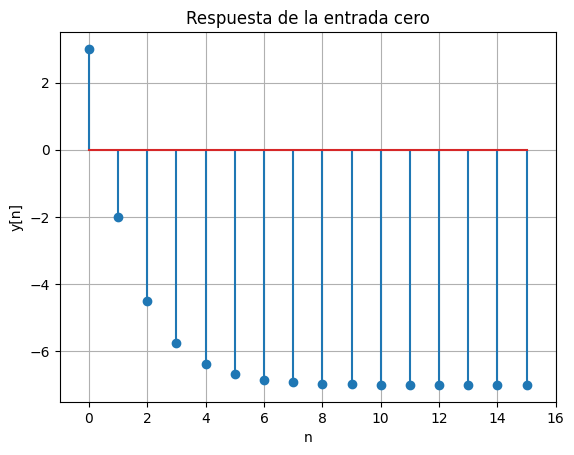

In [ ]:
#y[n]−1.5y[n−1]+0.5y[n−2]=x[n]
#Calculamos la zero input response, lo que nos indica que x[n]=0 y nuestra
#salida solo dependerá de las condiciones inciales que tengamos en el problema

#Nos piden que hallemos y grafiquemos el valor de la salida para 0<=n<=15

#Definimos el valor de n
n=np.arange(0,16,1)
#Inicializamos el valor de la salida con ceros y longitud igual a n
y=np.zeros_like(n,dtype=float)
#Definimos las codiciones iniciales
y[0]=3 #y[-2]=3
y[1]=-2 #y[-1]=-2

for i in range(2,16):
  y[i]=1.5*y[i-1]-0.5*y[i-2]


#Ploteamos la respuesta al estado cero
plt.stem(n,y)
plt.title('Respuesta de la entrada cero')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.xlim([-1,16])
plt.grid(True)
plt.show()


***Inciso b)***

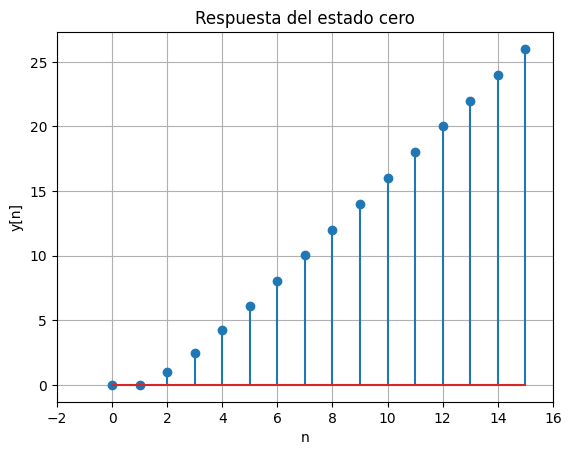

In [ ]:
#Calculamos la zero state response, lo que nos indica que cond. inc=0 y nuestra
#salida solo dependerá de la entrada que  tengamos en el problema

#Definimos el valor de n
n=np.arange(0,16,1)
#Inicializamos el valor de la salida con ceros y longitud igual a n
y=np.zeros_like(n,dtype=float)

#Definimos la entrada x[n]=u[n]
x=np.ones_like(n,dtype=float)

for i in range(2,16):
  y[i]=1.5*y[i-1]-0.5*y[i-2]+x[i]


#Ploteamos la respuesta al estado cero
plt.stem(n,y)
plt.title('Respuesta del estado cero')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.xlim([-2,16])
plt.grid(True)
plt.show()


***Inciso c)***

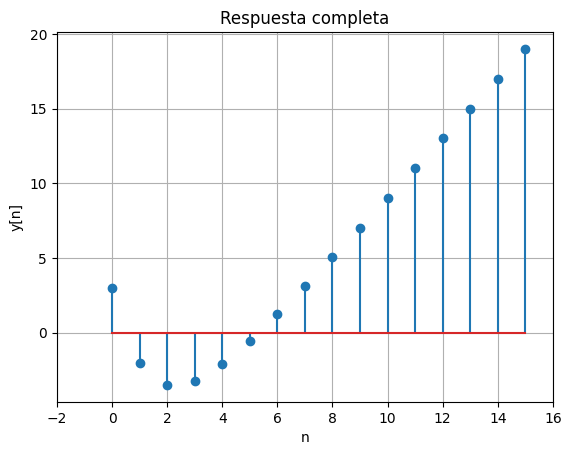

In [ ]:
#Utilizando ecuaciones recursivas, calcule y grafique la respuesta a una entrada
#x[n]=u[n] con condiciones iniciales y[-1]=-2, y[-2]=3 para 0<=n<=15. Compare lo
#obtenido con los ítems a y b

#Definimos el valor de n
n=np.arange(0,16,1)

#Inicializamos el valor de la salida con ceros y longitud igual a n
y=np.zeros_like(n,dtype=float)
#Definimos las codiciones iniciales
y[0]=3 #y[-2]=3
y[1]=-2 #y[-1]=-2

#Definimos la entrada x[n]=u[n]
x=np.ones_like(n,dtype=float)

for i in range(2,16):
  y[i]=1.5*y[i-1]-0.5*y[i-2]+x[i]


#Ploteamos la respuesta al estado cero
plt.stem(n,y)
plt.title('Respuesta completa')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.xlim([-2,16])
plt.grid(True)
plt.show()



Como podemos observar la gráfica en este inciso no será otra cosa que la suma de las dos señales anteriores que obtuvimos , esto debido a que se trata de la respuesta completa debido tanto a la entrada como a la condiciones iniciales que tenemos.

***Inciso d)***

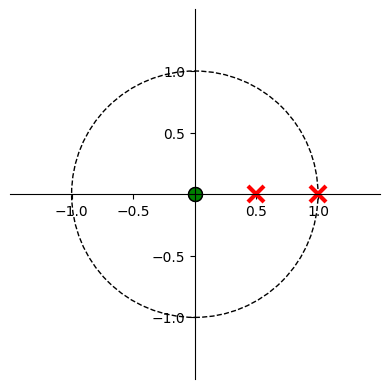

In [ ]:
#Importamos las librerias necesarias y definimos la función
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
def zplane(b,a,filename=None):

    ax = plt.subplot(111)
    uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    ax.add_patch(uc)

    if np.max(b) > 1:
        kn = np.max(b)
        b = [n / float(kn) for n in b]
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = [n / float(kd) for n in a]
    else:
        kd = 1

    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)

    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)


    return z, p, k
#Tenemos la siguiente función de transferencia
#H(z)=z^2/(z^2-1.5z+0.5)
#Definimos el numerador y denominador
num=[1,0,0]
den=[1,-1.5,0.5]

[zeros,polos,k]=zplane(num,den)

En este caso no existirá ROC para el cual el sistema sea BIBO estable, si recordamos la condición para que nuestro sistemas sea estable es que la región de convergencia incluya al circulo unitario , sin embargo este no es el caso.

***Pregunta 3***

***Parte a) y b)***

Ceros de la función de transferencia H(z): 
[-4.  2.  0.]
Polos de la función de transferencia H(z): 
[-1.+2.j -1.-2.j -1.+0.j]
Ceros de la función de transferencia G(z): 
[-4.  2.  0.]
Polos de la función de transferencia G(z): 
[-0.84781038+0.j          0.17390519+0.51442613j  0.17390519-0.51442613j]


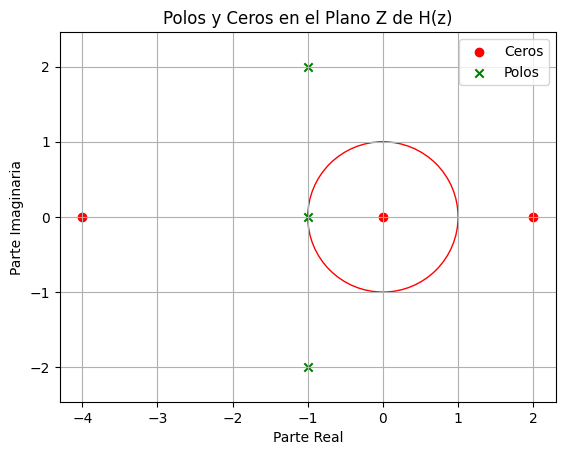

In [ ]:
#Obtenemos los polos y ceros de H(z) y G(z)
#Definimos el numerador y denominador de H(z)
num_H=[2,4,-16,0]
den_H=[1,3,7,5]

#Definimos el numerador y denominador de G(z)
num_G=num_H
den_G=[1,0.5,0,0.25]


#Hallamos los ceros y polos de H(z)
ceros_H=np.roots(num_H)
polos_H=np.roots(den_H)
print("Ceros de la función de transferencia H(z): ")
print(ceros_H)
print("Polos de la función de transferencia H(z): ")
print(polos_H)

#Hallamos los ceros y polos de G(z)
ceros_G=np.roots(num_G)
polos_G=np.roots(den_G)
print("Ceros de la función de transferencia G(z): ")
print(ceros_G)
print("Polos de la función de transferencia G(z): ")
print(polos_G)




#Se procedio a realizar un códifo diferente al enviado para el plano z ya que presentaban errores al tratar de ejecutar el código
#Graficamos la primera función de transferencia
# Creamos un círculo unitario lo cual nos indica si es estable el sistema
circulo = plt.Circle((0, 0), 1, color='red', fill=False)
fig, ax = plt.subplots()
ax.add_artist(circulo)
# Graficar los ceros
plt.scatter(ceros_H.real, ceros_H.imag, color='red', label='Ceros')
# Graficar los polos
plt.scatter(polos_H.real, polos_H.imag, color='green', marker='x', label='Polos')
plt.title('Polos y Ceros en el Plano Z de H(z)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

Como podemos observar en este caso para el sistema causal H(z) contamos con 3 polos , los cuales uno de ellos es -1 por lo que su ROC |z|>1, lo mismo para el otro polo el cual es -1-2j (el otro polo será solamente su conjugado , es decir pertenecen a la misma circunferencia).

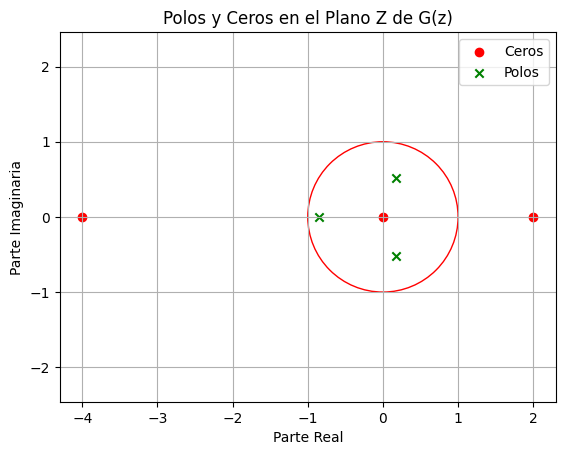

In [ ]:
#Graficamos los polos y ceros para la función de transferencua G(z)
# Creamos un círculo unitario lo cual nos indica si es estable el sistema
circulo = plt.Circle((0, 0), 1, color='red', fill=False)
fig, ax = plt.subplots()
ax.add_artist(circulo)

# Graficar los ceros
plt.scatter(ceros_G.real, ceros_G.imag, color='red', label='Ceros')
# Graficar los polos
plt.scatter(polos_G.real, polos_G.imag, color='green', marker='x', label='Polos')
plt.title('Polos y Ceros en el Plano Z de G(z)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

***Inciso c)***

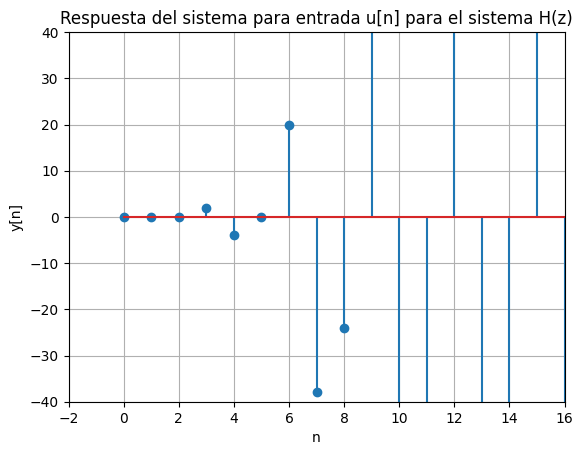

In [ ]:
#Con las funciones de transferencia, debo de dividir el numerador y denominador
#entre z^3 para poder expresar las ecuaciones de diferencias y a partir de alli
#hallar la respuesta cuando x[n]=u[n]

#Para el H(z)
#De acuerdo a ecuaciones de diferencia sabemos que
#y[n]=2x[n]-3y[n-1]-7y[n-2]-5y[n-3]
#salida solo dependerá de la entrada que  tengamos en el problema

#Definimos el valor de n
n=np.arange(0,200)
#Inicializamos el valor de la salida con ceros y longitud igual a n
y=np.zeros_like(n,dtype=float)

#Definimos la entrada x[n]=u[n]
x=np.ones_like(n,dtype=float)

#Definimos las condiciones iniciales
y[0]=0
y[1]=0
y[2]=0
for i in range(3,200):
  y[i]=2*x[i]-3*y[i-1]-7*y[i-2]-5*y[i-3]

#print(y)

#Ploteamos la gráfica
plt.stem(n,y)
plt.title('Respuesta del sistema para entrada u[n] para el sistema H(z)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.ylim([-40,40])
plt.xlim([-2,16])
plt.grid(True)
plt.show()

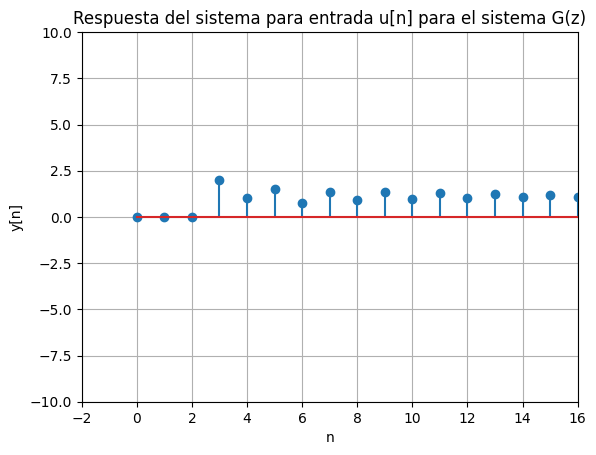

In [ ]:
#Para el G(z)
#De acuerdo a ecuaciones de diferencia sabemos que
#y[n]=2x[n]-0.5y[n-1]-0.25y[n-3]
#salida solo dependerá de la entrada que  tengamos en el problema

#Definimos el valor de n
n=np.arange(0,200)
#Inicializamos el valor de la salida con ceros y longitud igual a n
y=np.zeros_like(n,dtype=float)

#Definimos la entrada x[n]=u[n]
x=np.ones_like(n,dtype=float)

#Definimos las condiciones iniciales
y[0]=0
y[1]=0
y[2]=0
for i in range(3,200):
  y[i]=2*x[i]-0.5*y[i-1]-0.25*y[i-3]

#Ploteamos la gráfica
plt.stem(n,y)
plt.title('Respuesta del sistema para entrada u[n] para el sistema G(z)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.ylim([-10,10])
plt.xlim([-2,16])
plt.grid(True)
plt.show()

Como podemos notar existe diferencia entre lás gráficas que tenemos esto puede ser explicado a la estabilidad de cada sistemas , como podemos observar para el primer sistema H(z) sabiendo que es causal los polos del sistema no se encuentran dentro del circulo unitario , por otro lado el sistemga  G(z) si se encuentran dentro del circulo unitario por lo que podemos decir que el sistema es estable , eso se puede ver claramente en la grafica donde en el segundo sistema tenemos una suceción de puntos discretos con valores muy cercanos , en cambio para el primero vemos que para circuitos valores de n nuestra y[n] toma valores que se disparan.